# **Loan Approval Prediction**

## Importing libraries

In [28]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import polars as pl

## Loading the Dataset

In [79]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
df_train.loan_status.value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

## Quick data exploration

In [4]:
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [5]:
df_train[df_train.person_age > 70]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
4962,4962,84,108928,MORTGAGE,3.0,DEBTCONSOLIDATION,A,6000,7.51,0.06,N,25,0
6425,6425,73,32004,MORTGAGE,3.0,PERSONAL,B,7500,10.65,0.24,N,23,0
6750,6750,84,94800,MORTGAGE,2.0,PERSONAL,D,10000,14.09,0.11,N,22,0
15588,15588,80,54000,RENT,27.0,PERSONAL,A,10000,6.62,0.19,N,25,1
16954,16954,76,30000,RENT,2.0,HOMEIMPROVEMENT,D,6500,16.77,0.21,N,24,1
21953,21953,80,30000,RENT,7.0,MEDICAL,D,5000,14.96,0.17,N,24,1
24266,24266,73,40000,RENT,0.0,MEDICAL,B,1800,11.36,0.04,N,21,0
25499,25499,73,42000,RENT,7.0,PERSONAL,D,13750,14.96,0.32,N,24,1
47336,47336,123,36000,MORTGAGE,7.0,PERSONAL,B,6700,10.75,0.18,N,4,0


In [6]:
df_train.loan_grade	.value_counts()

loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64

## Data Pre-processing piplines 

In [7]:
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [80]:
class Standanderdizer(TransformerMixin, BaseEstimator):
    def fit(self,X, y=None):
        return self
    def transform(self, X):
        X['person_income'] = X['person_income'].apply(lambda x: x/100000)
        X['loan_amnt'] = X['loan_amnt'].apply(lambda x: x/100000)
        X['loan_percent_income'] = X['loan_percent_income'].apply(lambda x: x*100)
        X['person_age'] = X['person_age'].apply(lambda x: x/100)
        return X

class OwnershipEncoder(TransformerMixin, BaseEstimator):
    def fit(self,X, y=None):
        return self
    def transform(self, X):
        ownership_encoder = OneHotEncoder()
        matrix = ownership_encoder.fit_transform(X[['person_home_ownership']]).toarray()                
        ownership_cats = ownership_encoder.categories_
        for i in range(len(ownership_cats[0])):
            X[ownership_cats[0][i]] = matrix.T[i]
        return X


class LoanIntentEncoder(TransformerMixin, BaseEstimator):
    def fit(self,X, y=None):
        return self
    def transform(self, X):
        loan_intent_enc = OneHotEncoder()
        matrix = loan_intent_enc.fit_transform(X[['loan_intent']]).toarray()                
        loan_intent_cats = loan_intent_enc.categories_
        for i in range(len(loan_intent_cats[0])):
            X[loan_intent_cats[0][i]] = matrix.T[i]
        return X


class CBPersonEncoder(TransformerMixin, BaseEstimator):
    def fit(self,X, y=None):
        return self
    def transform(self, X):
        X['Y'] = X['cb_person_default_on_file'].apply(lambda x: 1 if x == 'Y' else 0)
        return X

class LoanGradeEncoder(TransformerMixin, BaseEstimator):
    def fit(self,X, y=None):
        return self
    def transform(self, X):
        long_grade_enc = OneHotEncoder()
        matrix = long_grade_enc.fit_transform(X[['loan_grade']]).toarray()                
        ownership_cats = long_grade_enc.categories_
        for i in range(len(ownership_cats[0])):
            X[ownership_cats[0][i]] = matrix.T[i]
        return X
        

class ColumnDropper(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(['id','person_home_ownership','loan_intent','cb_person_default_on_file','person_home_ownership', 'loan_grade','MORTGAGE','PERSONAL','A','loan_int_rate', 'cb_person_cred_hist_length','loan_percent_income','OTHER'],axis=1)
        # person_emp_length is needed

In [81]:
pre_processing_pipe = Pipeline([
    ('column_standardizer', Standanderdizer()), 
    ('ownership_encoder', OwnershipEncoder()), 
    ('loan_intent_encoder', LoanIntentEncoder()), 
    ('cb_person_encoder', CBPersonEncoder()), 
    ('loan_grade_encoder', LoanGradeEncoder()),
    ('column_dropper', ColumnDropper()),    
])

In [82]:
new_df = pre_processing_pipe.fit_transform(df_train)
new_df = new_df[new_df['person_age']<90]

In [14]:
new_df.corr().style.background_gradient(cmap='RdBu')

,person_age,person_income,loan_amnt,loan_status,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,VENTURE,Y,B,C,D,E,F,G
person_age,1.000000,0.102176,0.050378,-0.001130,-0.002834,0.007729,-0.051748,-0.018559,-0.127255,0.096444,0.020246,-0.012106,0.004408,-0.005142,0.001083,0.012138,0.009546,0.013077,0.002839
person_income,0.102176,1.000000,0.310942,-0.169956,0.003164,-0.042509,-0.260716,-0.001224,-0.020682,0.085912,-0.062012,0.007473,-0.035514,0.015667,-0.036753,-0.042052,-0.006213,-0.004014,-0.008198
loan_amnt,0.050378,0.310942,1.000000,0.144982,0.005683,-0.020390,-0.104832,-0.005191,-0.015336,0.062645,-0.034207,0.003692,0.020271,0.053154,-0.017970,0.071814,0.070362,0.032804,0.014251
loan_status,-0.001130,-0.169956,0.144982,1.000000,0.002918,-0.087556,0.239620,0.057682,-0.051005,0.031063,0.049139,-0.064378,0.186962,-0.083765,-0.009654,0.395646,0.182878,0.067644,0.045889
OTHER,-0.002834,0.003164,0.005683,0.002918,1.000000,-0.009270,-0.040715,-0.004663,-0.001747,0.000665,-0.010790,0.007925,0.002210,0.008315,-0.000839,0.003691,-0.001790,-0.001968,0.017546
OWN,0.007729,-0.042509,-0.020390,-0.087556,-0.009270,1.000000,-0.248311,-0.093133,0.007153,0.008323,-0.022774,0.093910,0.004342,-0.004227,-0.001458,0.008287,-0.010483,0.000041,0.000748
RENT,-0.051748,-0.260716,-0.104832,0.239620,-0.040715,-0.248311,1.000000,0.025464,0.013045,-0.068571,0.081507,-0.043145,0.095962,0.054734,0.105564,0.071879,0.031402,0.009676,0.009766
DEBTCONSOLIDATION,-0.018559,-0.001224,-0.005191,0.057682,-0.004663,-0.093133,0.025464,1.000000,-0.220930,-0.148734,-0.205604,-0.194859,-0.008228,-0.008685,-0.004894,0.009407,-0.013791,-0.002059,-0.006225
EDUCATION,-0.127255,-0.020682,-0.015336,-0.051005,-0.001747,0.007153,0.013045,-0.220930,1.000000,-0.178140,-0.246254,-0.233384,0.005681,-0.004976,0.023253,-0.026536,0.000927,-0.002646,-0.003367
HOMEIMPROVEMENT,0.096444,0.085912,0.062645,0.031063,0.000665,0.008323,-0.068571,-0.148734,-0.178140,1.000000,-0.165783,-0.157119,0.022051,-0.014418,0.001158,0.030106,0.027120,0.006621,-0.005892


In [472]:
# features = ['person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']

# quantiles = new_df[features].quantile([0.01, 0.97])

# filtered_df = new_df[
#     (new_df[features] >= quantiles.loc[0.01]).all(axis=1) &
#     (new_df[features] <= quantiles.loc[0.97]).all(axis=1)
# ]

In [473]:
filtered_df.shape

(50389, 23)

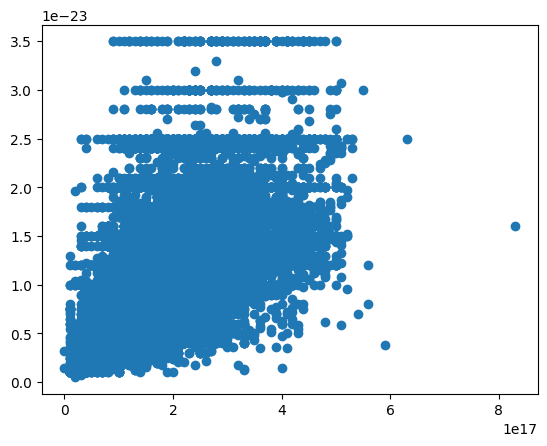

In [294]:
df_new_approved = new_df[new_df['loan_status']==1]['loan_percent_income']
df_new_not_approved = new_df[new_df['loan_status']==0]['loan_percent_income']

# plt.hist([df_new_approved, df_new_not_approved])

plt.scatter(new_df['loan_percent_income'], new_df['loan_amnt'])

## Model Creation

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [83]:
X = new_df.drop('loan_status',axis=1)
y = new_df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2,test_size=0.2)

### Logistic Regression

In [67]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

cross_val_score(lr, X_test, y_test)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.89471441, 0.89300938, 0.89045183, 0.8998295 , 0.8989339 ])

### Random Forest

In [84]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
rf.score(X_test, y_test)
cross_val_score(rf, X_test, y_test)

array([0.9369139 , 0.94416027, 0.93861893, 0.94416027, 0.93773987])

In [239]:
# param_grid = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [None, 10, 30, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False]
# }

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# grid_search.fit(X_train,y_train)

In [318]:
corr_matrix = X.corr()
threshold = 0.7
features_to_remove = set()
for i in range(len(corr_matrix.columns)):
    for x in corr_matrix.iloc[i]:
        if abs(x) >= threshold:
            if x != 1:
                # print(corr_matrix.columns[i], x)
                features_to_remove.add(corr_matrix.columns[i])

print(features_to_remove)

{'cb_person_cred_hist_length', 'person_age'}


In [47]:
lr_test = LogisticRegression()
lr_test.fit(X, y)

LogisticRegression()

In [86]:
rf_test = RandomForestClassifier()
rf_test.fit(X, y)

RandomForestClassifier()

In [87]:
test_data = pd.read_csv('test.csv')

In [88]:
test_data_processed = pre_processing_pipe.fit_transform(test_data)
test_data_processed.head()

,person_age,person_income,person_emp_length,loan_amnt,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,VENTURE,Y,B,C,D,E,F,G
0,0.23,0.69,3.0,0.25,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.26,0.96,6.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.26,0.30,5.0,0.04,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0
3,0.33,0.50,4.0,0.07,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.26,1.02,8.0,0.15,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0


In [380]:
X.columns

Index(['person_age', 'person_income', 'loan_amnt', 'loan_percent_income',
       'OTHER', 'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION',
       'HOMEIMPROVEMENT', 'MEDICAL', 'VENTURE', 'Y', 'B', 'C', 'D', 'E', 'F',
       'G'],
      dtype='object')

In [381]:
test_data_processed.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'OTHER', 'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION',
       'HOMEIMPROVEMENT', 'MEDICAL', 'VENTURE', 'Y', 'B', 'C', 'D', 'E', 'F',
       'G'],
      dtype='object')

In [382]:
for i in test_data_processed.columns:
    if i not in X.columns:
        print(i)



person_emp_length


In [89]:
predictions = rf_test.predict(test_data_processed)

In [90]:
predictions_submission = pd.DataFrame({
    'id' : test_data['id'], 
    'loan_status' : predictions 
})

In [91]:
predictions_submission['loan_status'].value_counts()

loan_status
0    34834
1     4264
Name: count, dtype: int64

In [92]:
predictions_submission.to_csv('submission.csv',index=False)